<a href="https://colab.research.google.com/github/SimeonHristov99/AI_HandwrittenDigitClassifier_Tensorflow/blob/main/TensorflowMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

Handwritten digit classifier
------------

The goal of this project is to build and train a digit classifier based on the [MNIST](https://wiki.pathmind.com/mnist) dataset. This is achieved by using [Tensorflow](https://www.tensorflow.org/).

In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Loading data

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


There are 60000 training images with dimensions 28 x 28. In other words, each sample is a square matrx and every element in that matrix is a value of a pixel. The lower the value the less "activation" that pixel has.

In [3]:
X_train.dtype

dtype('uint8')

In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

There are 10 classes to predict - each label is the actual digit

# Visualizing data

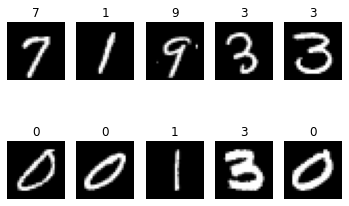

In [5]:
for i in range(10):
  plt.subplot(2, 5, i + 1)
  sample_idx = np.random.randint(X_train.shape[0]) # generate random number between 0 and 59_999
  image = X_train[sample_idx] # get that image
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.title(y_train[sample_idx])

plt.show()

# Data pre-processing

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train = tf.expand_dims(X_train, -1)
X_test = tf.expand_dims(X_test, -1)
X_train.shape

TensorShape([60000, 28, 28, 1])

In [8]:
X_train = X_train / 255
X_test = X_test / 255

# Choosing a model

  - Layer 1: Flattening layer. Used to combine all pixels in one big vector.
  - Layer 2: Dense hidden layer with 300 neurons. It will use the ReLU activation function.
  - Layer 3: Dense hidden layer with 100 neurons. It will use the ReLU activation function.
  - Layer 4: Dense output layer with 10 neurons (one per class/digit label). It will use the softmax activation function.

Inspiration for the model: [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646)

In [9]:
model = keras.Sequential([
 keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)),
 keras.layers.MaxPool2D(),
 keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)),
 keras.layers.MaxPool2D(),
 keras.layers.Flatten(),
 keras.layers.Dense(units=10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training

In [10]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)

Epoch 1/10
1500/1500 [==============================] - 36s 23ms/step - loss: 0.2457 - accuracy: 0.9267 - val_loss: 0.0947 - val_accuracy: 0.9702
Epoch 2/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0817 - accuracy: 0.9749 - val_loss: 0.0764 - val_accuracy: 0.9771
Epoch 3/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0625 - accuracy: 0.9813 - val_loss: 0.0665 - val_accuracy: 0.9800
Epoch 4/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0516 - accuracy: 0.9838 - val_loss: 0.0570 - val_accuracy: 0.9833
Epoch 5/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0440 - accuracy: 0.9863 - val_loss: 0.0494 - val_accuracy: 0.9854
Epoch 6/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0381 - accuracy: 0.9878 - val_loss: 0.0495 - val_accuracy: 0.9857
Epoch 7/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0332 - accuracy: 0.9891 - val_loss: 0.0490 -

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 10,330
Trainable params: 10,330
Non-trainable params: 0
____________________________________________________

# Evaluation

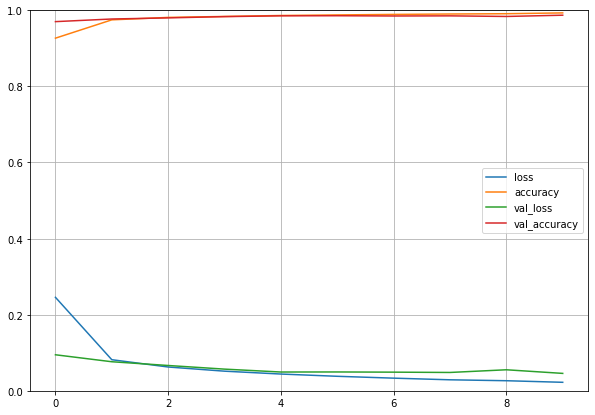

In [12]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0451 - accuracy: 0.9859


[0.045103639364242554, 0.9858999848365784]